In [135]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 300)
import praw #reddit data api
import ffn #for loading financial data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import re #regex
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pprint import pprint
import requests
import json
import csv
import time
import datetime

In [41]:
import tensorflow as tf
from tensorflow import keras
tf.test.gpu_device_name() #run to make sure tensorflow is connected to gpu (if applicable)

''

In [114]:
df = pd.read_csv('dd_comments.csv')

In [115]:
df.head()

,Post_Type,Submission_ID,Comment_ID,Parent_ID,Author,Body,Flair,Distinguished,Is_Author,Score,Created_Date_UTC
0,Comment,m27zg5,gqhu5kj,t3_m27zg5,peon2,['This thread is the greatest trilogy since LO...,NaN,NaN,False,556,[1615411278.0]
1,Comment,m27zg5,gqhpcdw,t3_m27zg5,CoolJoeFlaccid,['“WE CAN REMAIN RETARDED LONGER THAN YOU CAN ...,NaN,NaN,False,3503,[1615409194.0]
2,Comment,m27zg5,gqhuxc0,t3_m27zg5,sarcasticsnowleopard,"[""im still in because of the guy at my college...",NaN,NaN,False,2376,[1615411615.0]
3,Comment,m27zg5,gqhrmpp,t3_m27zg5,noobsbane283,"['Imagine throwing 750,000 shorts at a stock t...",NaN,NaN,False,9979,[1615410164.0]
4,Comment,m27zg5,gqhp6tk,t3_m27zg5,alcycul,['Considering what happened today the fact we ...,NaN,NaN,False,13353,[1615409129.0]


In [116]:
from dateutil import parser
ds = '2012-03-01T10:00:00Z' # or any date sting of differing formats.
date = parser.parse(ds)

In [117]:
#df['Date'] = datetime.datetime.fromtimestamp(df['Created_Date_UTC']).date()
df.head()

,Post_Type,Submission_ID,Comment_ID,Parent_ID,Author,Body,Flair,Distinguished,Is_Author,Score,Created_Date_UTC
0,Comment,m27zg5,gqhu5kj,t3_m27zg5,peon2,['This thread is the greatest trilogy since LO...,NaN,NaN,False,556,[1615411278.0]
1,Comment,m27zg5,gqhpcdw,t3_m27zg5,CoolJoeFlaccid,['“WE CAN REMAIN RETARDED LONGER THAN YOU CAN ...,NaN,NaN,False,3503,[1615409194.0]
2,Comment,m27zg5,gqhuxc0,t3_m27zg5,sarcasticsnowleopard,"[""im still in because of the guy at my college...",NaN,NaN,False,2376,[1615411615.0]
3,Comment,m27zg5,gqhrmpp,t3_m27zg5,noobsbane283,"['Imagine throwing 750,000 shorts at a stock t...",NaN,NaN,False,9979,[1615410164.0]
4,Comment,m27zg5,gqhp6tk,t3_m27zg5,alcycul,['Considering what happened today the fact we ...,NaN,NaN,False,13353,[1615409129.0]


In [118]:
df['Created_Date_UTC'] = df.Created_Date_UTC.str.replace("[", "")
df['Created_Date_UTC'] = df.Created_Date_UTC.str.replace("]", "")
df.head()

,Post_Type,Submission_ID,Comment_ID,Parent_ID,Author,Body,Flair,Distinguished,Is_Author,Score,Created_Date_UTC
0,Comment,m27zg5,gqhu5kj,t3_m27zg5,peon2,['This thread is the greatest trilogy since LO...,NaN,NaN,False,556,1615411278.0
1,Comment,m27zg5,gqhpcdw,t3_m27zg5,CoolJoeFlaccid,['“WE CAN REMAIN RETARDED LONGER THAN YOU CAN ...,NaN,NaN,False,3503,1615409194.0
2,Comment,m27zg5,gqhuxc0,t3_m27zg5,sarcasticsnowleopard,"[""im still in because of the guy at my college...",NaN,NaN,False,2376,1615411615.0
3,Comment,m27zg5,gqhrmpp,t3_m27zg5,noobsbane283,"['Imagine throwing 750,000 shorts at a stock t...",NaN,NaN,False,9979,1615410164.0
4,Comment,m27zg5,gqhp6tk,t3_m27zg5,alcycul,['Considering what happened today the fact we ...,NaN,NaN,False,13353,1615409129.0


In [119]:
for index, row in df.iterrows():
    orig_utc = row[10]
    size = len(row[10])
    mod_utc = orig_utc[:size - 2]
    df.at[index, 'Created_Date_UTC'] = mod_utc

In [120]:
df['Created_Date_UTC'] = pd.to_numeric(df['Created_Date_UTC'])

In [121]:
#format = "%y/%m/%d %H:%M:%S.%f"
for index, row in df.iterrows():
    #dt_object = datetime.datetime.strptime(row[10], format)
    #print(dt_object)
    utc_date = row[10]
    #print(date)
    #print(datetime.datetime.fromtimestamp(utc_date).strftime("%m/%d/%Y"))
    #df['Date'] = 
    date = datetime.datetime.fromtimestamp(utc_date).date()
    df.at[index, 'Date'] = date

In [122]:
df.head()

,Post_Type,Submission_ID,Comment_ID,Parent_ID,Author,Body,Flair,Distinguished,Is_Author,Score,Created_Date_UTC,Date
0,Comment,m27zg5,gqhu5kj,t3_m27zg5,peon2,['This thread is the greatest trilogy since LO...,NaN,NaN,False,556,1615411278,2021-03-10
1,Comment,m27zg5,gqhpcdw,t3_m27zg5,CoolJoeFlaccid,['“WE CAN REMAIN RETARDED LONGER THAN YOU CAN ...,NaN,NaN,False,3503,1615409194,2021-03-10
2,Comment,m27zg5,gqhuxc0,t3_m27zg5,sarcasticsnowleopard,"[""im still in because of the guy at my college...",NaN,NaN,False,2376,1615411615,2021-03-10
3,Comment,m27zg5,gqhrmpp,t3_m27zg5,noobsbane283,"['Imagine throwing 750,000 shorts at a stock t...",NaN,NaN,False,9979,1615410164,2021-03-10
4,Comment,m27zg5,gqhp6tk,t3_m27zg5,alcycul,['Considering what happened today the fact we ...,NaN,NaN,False,13353,1615409129,2021-03-10


In [191]:
min_date = min(df['Date'])
max_date = max(df['Date'])
print(min_date)
print(max_date)

2021-02-28
2021-03-15


In [192]:
df = df.sort_values(by='Date')
df.reset_index(drop=True, inplace=True)
df.head()

,Post_Type,Submission_ID,Comment_ID,Parent_ID,Author,Body,Flair,Distinguished,Is_Author,Score,Created_Date_UTC,Date
0,Comment,luqc3p,gp8xuhi,t3_luqc3p,Superfiend78,['Could we get a GME thread again mods?\nPrett...,NaN,NaN,False,96,1614558804,2021-02-28
1,Comment,luqc3p,gp85ml1,t3_luqc3p,32_ciN,['Buy the dips 📈🚀'],NaN,NaN,False,29,1614546301,2021-02-28
2,Comment,luqc3p,gp8ctzi,t3_luqc3p,mnm8844,['Futures going to jump 100 points. Bears are ...,NaN,NaN,False,29,1614548652,2021-02-28
3,Comment,luqc3p,gp914wn,t3_luqc3p,IlBlueberryll,['Rooting on GME and hoping AMC follows!!'],NaN,NaN,False,31,1614560682,2021-02-28
4,Comment,luqc3p,gp8b96h,t3_luqc3p,Bridgeb5252,['Been waiting all weekend to be disappointed ...,NaN,NaN,False,58,1614548046,2021-02-28


In [193]:
comments_by_day = []
comments_list = []
prev_date = min_date
current_date = ""
dates = []
for index, row in df.iterrows():
    current_date = row[11]
    if prev_date == current_date:
        comments_list.append(row[5])
    else:
        comments_by_day.append(comments_list)
        dates.append(current_date)
        prev_date = current_date
        comments_list = []
        comments_list.append(row[5])

In [194]:
## run vader sentiment analyzer

analyzer = SIA()

scores=[]
for comments in comments_by_day:
    sentiment_score=0
    try:
        for comment in comments:
            sentiment_score=sentiment_score+analyser.polarity_scores(comment)['compound']
    except TypeError:
        sentiment_score=0
    
    scores.append(sentiment_score)
    
#df_1['sentiment score']=scores

In [195]:
print(scores)

[7.751500000000004, -0.4717999999999981, 11.03149999999999, 8.5183, 9.0196, 17.293100000000003, 3.5384, 13.8782]


In [196]:
zip_lists = list(zip(dates, comments_by_day, scores))

In [197]:
daily_comments_df = pd.DataFrame(zip_lists, columns = ['Date', 'Comments', 'Score'])
daily_comments_df.head()

,Date,Comments,Score
0,2021-03-01,[['Could we get a GME thread again mods?\nPret...,7.7515
1,2021-03-02,[['15 more minutes till I start losing more mo...,-0.4718
2,2021-03-03,"[['100% of my portfolio now is GME'], ['I’m st...",11.0315
3,2021-03-09,[['This is a solid investment egen ur you are ...,8.5183
4,2021-03-10,"[['holy shit i fucking held.'], ['Oh god oh fu...",9.0196


In [198]:
## merge with spy price and plot

#spy=ffn.get('spy', start='2020-11-01')
spy=ffn.get('spy', start=min_date)

In [199]:
spy_vals=[]
for date in daily_comments_df['Date'].tolist():
    try:
        spy_vals.append(float(spy.loc[date]))
    except KeyError:
        spy_vals.append(None)  
daily_comments_df['spy']=spy_vals

In [200]:
daily_comments_df=daily_comments_df[['Date','Score','spy']]
daily_comments_df=daily_comments_df.set_index('Date')
daily_comments_df=daily_comments_df[daily_comments_df['spy'].notna()]

daily_comments_df.to_csv('positive+negative_sentiment_data_1.csv')

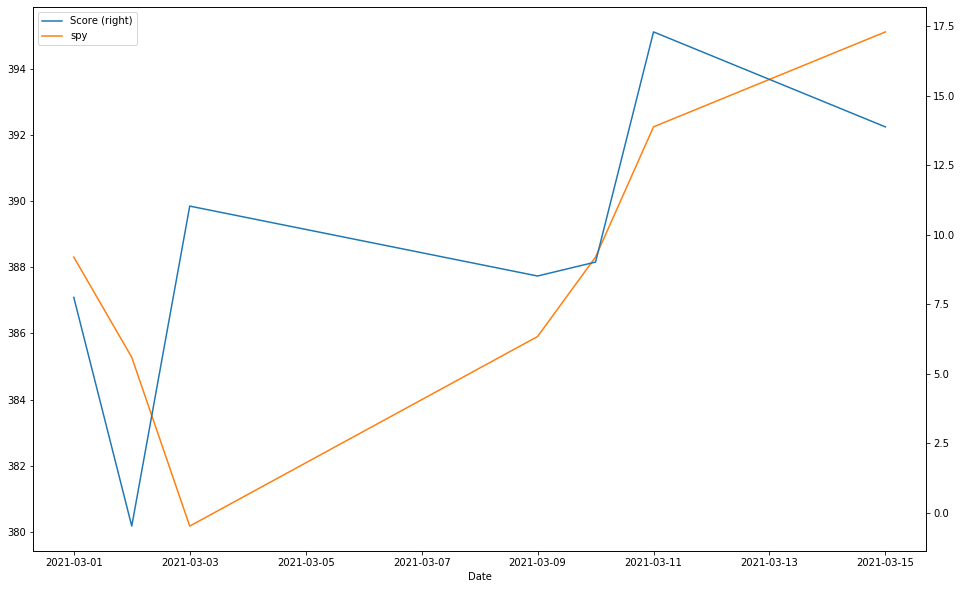

In [201]:
daily_comments_df.plot(secondary_y='Score', figsize=(16, 10));

In [202]:
## fourier transform

close_fft = np.fft.fft(np.asarray(daily_comments_df['Score'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
print(fft_df)
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
print(fft_df)
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
print(fft_df)
#fft_list = np.asarray(fft_df['fft'].tolist())
fft_list = np.asarray(fft_df['fft'].tolist())

                   fft
0  67.020400+0.000000j
1 -5.993665+17.541396j
2 -9.816586+10.881477j
3   9.430300+1.819447j
4   9.430300-1.819447j
5 -9.816586-10.881477j
6 -5.993665-17.541396j
                   fft   absolute
0  67.020400+0.000000j  67.020400
1 -5.993665+17.541396j  18.537114
2 -9.816586+10.881477j  14.655098
3   9.430300+1.819447j   9.604215
4   9.430300-1.819447j   9.604215
5 -9.816586-10.881477j  14.655098
6 -5.993665-17.541396j  18.537114
                   fft   absolute     angle
0  67.020400+0.000000j  67.020400  0.000000
1 -5.993665+17.541396j  18.537114  1.900046
2 -9.816586+10.881477j  14.655098  2.304791
3   9.430300+1.819447j   9.604215  0.190594
4   9.430300-1.819447j   9.604215 -0.190594
5 -9.816586-10.881477j  14.655098 -2.304791
6 -5.993665-17.541396j  18.537114 -1.900046


In [208]:
for num_ in [5, 10, 15, 20]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    daily_comments_df['fourier '+str(num_)]=np.fft.ifft(fft_list_m10)

daily_comments_df.head()

,Score,spy,fourier 5,fourier 10,fourier 15,fourier 20
Date,,,,,,
2021-03-01,7.7515,388.308197,7.751500+0.000000j,7.751500+0.000000j,7.751500+0.000000j,7.751500+0.000000j
2021-03-02,-0.4718,385.278137,-0.471800+0.000000j,-0.471800+0.000000j,-0.471800+0.000000j,-0.471800+0.000000j
2021-03-03,11.0315,380.174835,11.031500+0.000000j,11.031500+0.000000j,11.031500+0.000000j,11.031500+0.000000j
2021-03-09,8.5183,385.906067,8.518300+0.000000j,8.518300+0.000000j,8.518300+0.000000j,8.518300+0.000000j
2021-03-10,9.0196,388.308197,9.019600+0.000000j,9.019600+0.000000j,9.019600+0.000000j,9.019600+0.000000j


In [209]:
import numpy as np

/Users/madisonleopold/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/madisonleopold/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/madisonleopold/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/madisonleopold/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


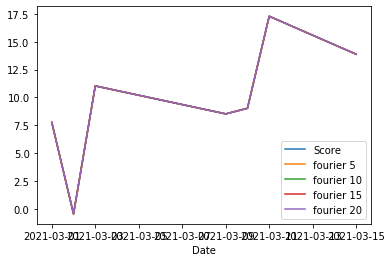

In [211]:
daily_comments_df[['Score', 'fourier 5', 'fourier 10', 'fourier 15', 'fourier 20']].plot()

/Users/madisonleopold/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


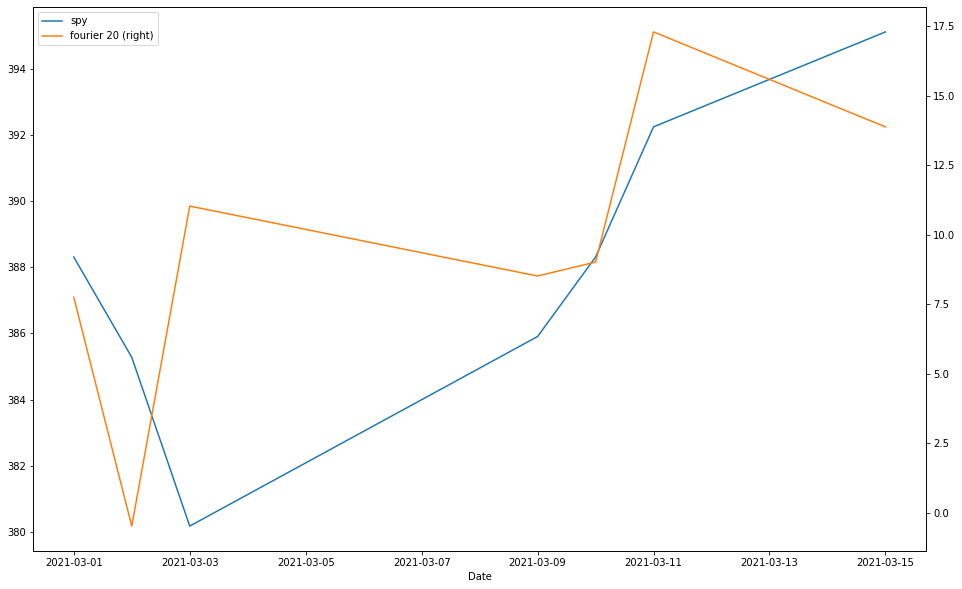

In [212]:
daily_comments_df[['spy', 'fourier 20']].plot(secondary_y='fourier 20', figsize=(16, 10))